In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import date
from sklearn import metrics
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
for i in df:
    print(df[i].value_counts())
    print("   ")
    print("------------------------")

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
   
------------------------
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
   
------------------------
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64
   
------------------------
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: Present_Price, Length: 1

In [8]:
df.drop(["Car_Name"], axis = 1, inplace = True)

In [9]:
df.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [10]:
todays_date = date.today()
  
print("Current date: ", todays_date)
  
#print("Current_year:", todays_date.year)
Current_year = todays_date.year

print("Current month:", todays_date.month)
print("Current day:", todays_date.day)

Current date:  2023-05-18
Current month: 5
Current day: 18


In [11]:
years = Current_year - df['Year']

In [12]:
print(years)

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: Year, Length: 301, dtype: int64


In [13]:
df['years'] = years

In [14]:
df.drop(['Year'], axis=1, inplace=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [16]:
df2 = pd.get_dummies(df, drop_first=True)

In [17]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


<AxesSubplot:>

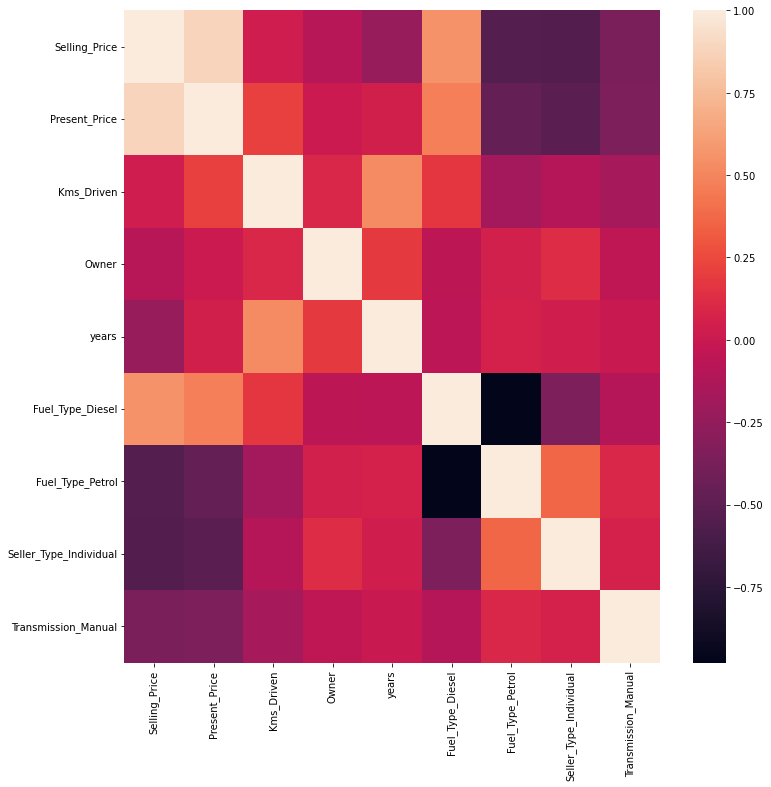

In [18]:
cor = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor)

In [19]:
cor['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
years                    -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

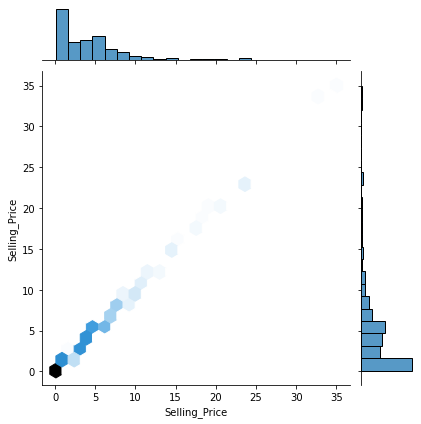

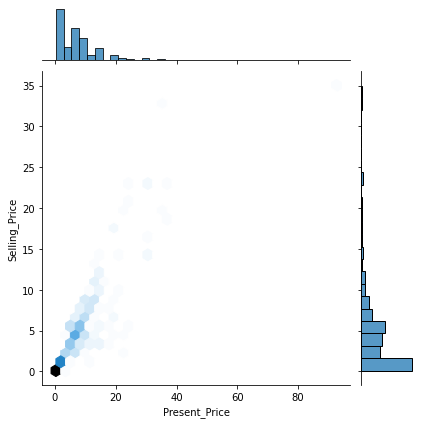

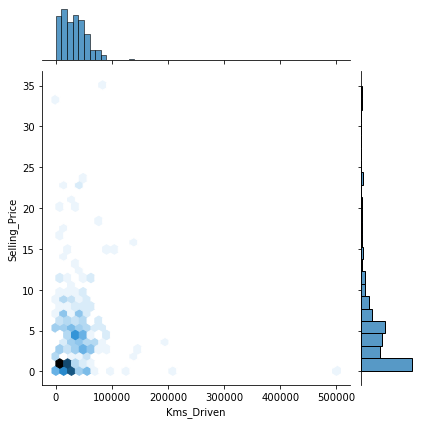

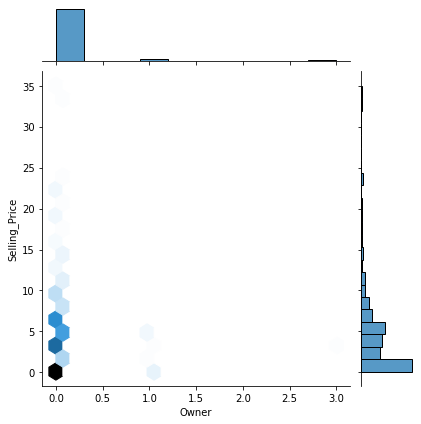

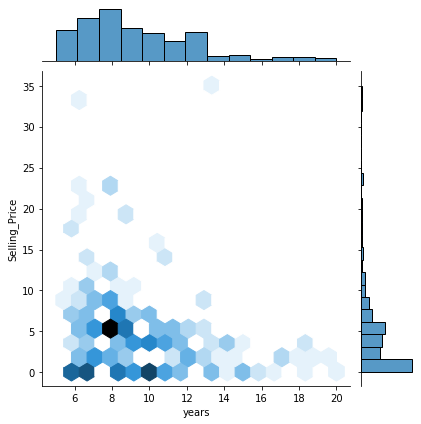

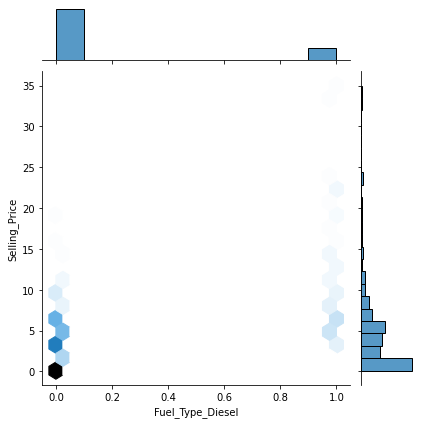

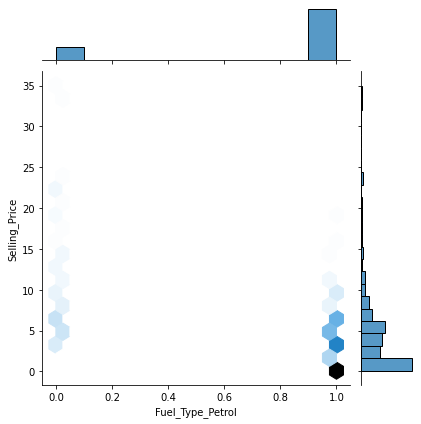

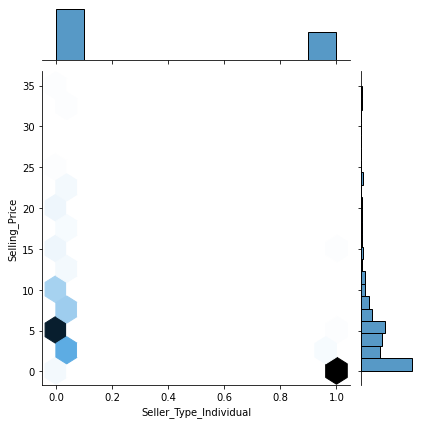

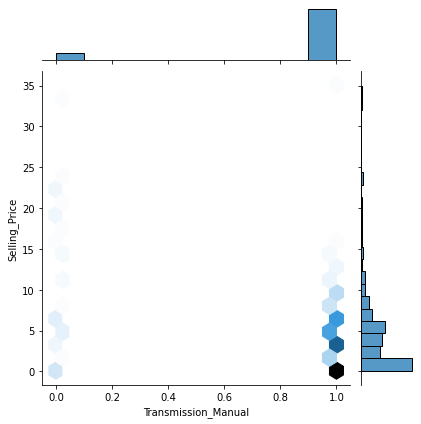

In [20]:
for i in df2:    
    sns.jointplot(x=df2[i], y='Selling_Price', data=df2, kind='hex')

In [21]:
'''for feature in df2:
    df2[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()'''

'for feature in df2:\n    df2[feature].hist(bins=25)\n    plt.xlabel(feature)\n    plt.ylabel("Count")\n    plt.title(feature)\n    plt.show()'

In [22]:
'''def plot_box(df2, feature):
    plt.figure(figsize=(10,6))
    df2.boxplot(column=[feature])
    plt.show()
for columns in df2:
    plot_box(df2,columns)'''

'def plot_box(df2, feature):\n    plt.figure(figsize=(10,6))\n    df2.boxplot(column=[feature])\n    plt.show()\nfor columns in df2:\n    plot_box(df2,columns)'

In [23]:
df2.loc[df2['Present_Price']>=22,'Present_Price']=22
df2.loc[df2['Kms_Driven']>=100000,'Kms_Driven']=100000
df2.loc[df2['years']>=15,'years']=15

In [24]:
df3=df2.copy()

In [25]:
'''def plot_box(df3, feature):
    plt.figure(figsize=(10,6))
    df3.boxplot(column=[feature])
    plt.show()
for columns in df3:
    plot_box(df3,columns)'''

'def plot_box(df3, feature):\n    plt.figure(figsize=(10,6))\n    df3.boxplot(column=[feature])\n    plt.show()\nfor columns in df3:\n    plot_box(df3,columns)'

In [26]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [27]:
'''from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df3=pd.DataFrame(min_max.fit_transform(df3),columns=df3.columns)
df3.head()'''

'from sklearn.preprocessing import MinMaxScaler\nmin_max=MinMaxScaler()\ndf3=pd.DataFrame(min_max.fit_transform(df3),columns=df3.columns)\ndf3.head()'

In [28]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df3=pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\ndf3=pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)'

In [29]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [30]:
x=df3.drop(["Selling_Price"], axis=1)
y=df3["Selling_Price"]

In [31]:
x.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [32]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train=pd.DataFrame(min_max.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(min_max.fit_transform(x_test),columns=x_test.columns)
x_train.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.397140,0.829146,0.0,0.333333,1.0,0.0,0.0,1.0
1,0.189576,0.233256,0.0,0.555556,0.0,1.0,0.0,1.0
2,1.000000,0.055276,0.0,0.000000,1.0,0.0,0.0,0.0
3,0.298893,0.326824,0.0,0.333333,0.0,1.0,0.0,1.0
4,0.349631,0.282101,0.0,0.111111,0.0,1.0,0.0,1.0


In [35]:
x_test.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.412587,0.817195,0.0,0.3,1.0,0.0,0.0,1.0
1,0.012867,0.073826,0.0,0.7,0.0,1.0,1.0,1.0
2,0.240093,0.324537,0.0,0.3,0.0,1.0,0.0,1.0
3,0.515152,0.449503,0.0,0.2,1.0,0.0,0.0,1.0
4,0.896037,0.194631,0.0,0.1,1.0,0.0,0.0,0.0


In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
print('Score:',r2_score(y_test, lr_pred))

MAE: 1.6191564709752067
MSE: 5.192952771584564
RMSE: 2.278805119264165
Score: 0.7945607736379573


In [47]:
from sklearn.ensemble import RandomForestRegressor
rfc =  RandomForestRegressor()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print('MAE:',metrics.mean_absolute_error(y_test,rfc_pred))
print('MSE:',metrics.mean_squared_error(y_test,rfc_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rfc_pred)))
print("score:",r2_score(y_test, rfc_pred))

MAE: 0.8154426229508197
MSE: 1.2983229019672142
RMSE: 1.139439731608133
score: 0.9486368422205237


In [48]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_test, y_test)
dtc_pred = dtc.predict(x_test)

print('MAE:',metrics.mean_absolute_error(y_test,dtc_pred))
print('MSE:',metrics.mean_squared_error(y_test,dtc_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dtc_pred)))
print("score: ",r2_score(y_test, dtc_pred))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
score:  1.0


In [59]:
from sklearn.model_selection import GridSearchCV, KFold

In [60]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"max_features": np.arange(3,15)}
gcv = GridSearchCV(rfc, param_grid = params, verbose = 3, scoring = "r2", cv = kfold)
gcv.fit(x, y)
prediction = gcv.predict(x_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....................max_features=3;, score=0.954 total time=   0.0s
[CV 2/5] END ....................max_features=3;, score=0.966 total time=   0.0s
[CV 3/5] END ....................max_features=3;, score=0.716 total time=   0.0s
[CV 4/5] END ....................max_features=3;, score=0.659 total time=   0.0s
[CV 5/5] END ....................max_features=3;, score=0.912 total time=   0.0s
[CV 1/5] END ....................max_features=4;, score=0.961 total time=   0.0s
[CV 2/5] END ....................max_features=4;, score=0.968 total time=   0.0s
[CV 3/5] END ....................max_features=4;, score=0.569 total time=   0.0s
[CV 4/5] END ....................max_features=4;, score=0.640 total time=   0.0s
[CV 5/5] END ....................max_features=4;, score=0.920 total time=   0.0s
[CV 1/5] END ....................max_features=5;, score=0.962 total time=   0.0s
[CV 2/5] END ....................max_features=5;

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\DELL\anaconda3\lib\site-packages\joblib\

In [61]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 3}
0.8416293134510034


In [62]:
df3.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
5,9.25,9.83,2071,0,5,1,0,0,1
6,6.75,8.12,18796,0,8,0,1,0,1
7,6.50,8.61,33429,0,8,1,0,0,1
8,8.75,8.89,20273,0,7,1,0,0,1
9,7.45,8.92,42367,0,8,1,0,0,1


In [63]:
testing2 = gcv.predict(x)
print(testing2)

[ 3.727   5.1585  7.627   2.771   4.62   10.0255  6.6395  6.797   8.6627
  7.247   2.976   6.9925  7.2406  5.9605  2.7256  7.786   7.4524  7.786
  3.6005  2.7836  2.9095  4.9565  4.1023  2.5385  2.9525  2.954   3.9435
  4.612   2.2405  7.3015  3.295   2.606   4.9745  6.2425  5.492   3.146
  4.518   0.6599  3.223   2.2817  5.958   2.595   2.1155  5.5255  1.763
  7.396   2.8755  1.4491  5.8585  7.5767 15.2255 22.8371 18.549  15.1668
  2.6543  4.01    4.4995  4.895   4.205  20.5026  6.8362  4.7865 19.2401
 22.7528 28.54    4.704  17.3113 10.5454  4.4399 14.2801  4.1385  5.3396
  6.842   2.8445  6.1354  4.049   5.5876  2.4752  7.461  15.3734 13.5672
  5.524  23.2175 11.6685  6.9005  3.9611 23.539   5.7125  3.5965  4.5285
  4.0944 10.1488  3.5275 22.8371  5.0508  5.6971 21.8974 14.6848  6.92
 10.8729  1.5749  1.6265  1.578   1.4605  1.3835  1.2265  1.2995  1.151
  1.1689  1.1915  1.178   1.158   1.1505  1.131   1.1358  1.1202  1.0441
  1.1222  1.0921  1.0626  1.0262  1.026   0.9465  0.9998 

In [64]:
df2.tail()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,9.50,11.6,33988,0,7,1,0,0,1
297,4.00,5.9,60000,0,8,0,1,0,1
298,3.35,11.0,87934,0,14,0,1,0,1
299,11.50,12.5,9000,0,6,1,0,0,1
300,5.30,5.9,5464,0,7,0,1,0,1


In [65]:
Output_prediction = rfc_grid.predict([[11.6, 33988, 0, 6, 1, 0, 0, 1]])
print(Output_prediction)

[8.82202471]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [66]:
import pickle
file = open('PRICE_PREDICTION.pkl', 'wb')

pickle.dump(gcv , file)